In [ ]:
!pip install numpy matplotlib scipy pandas

In [23]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

## Нафикова Лиана

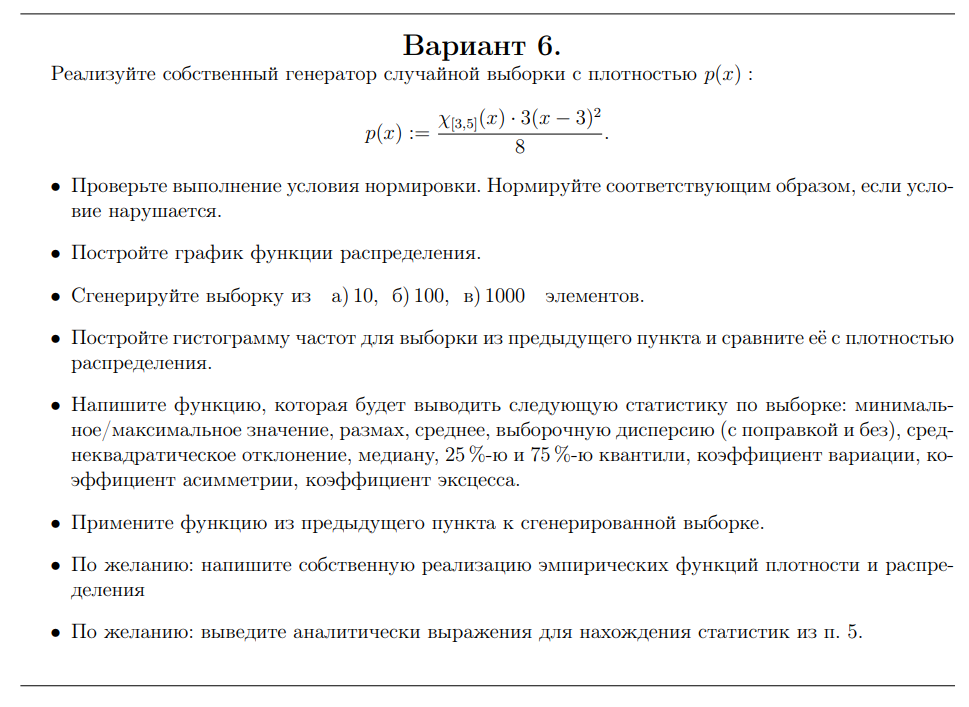

### Задание 1

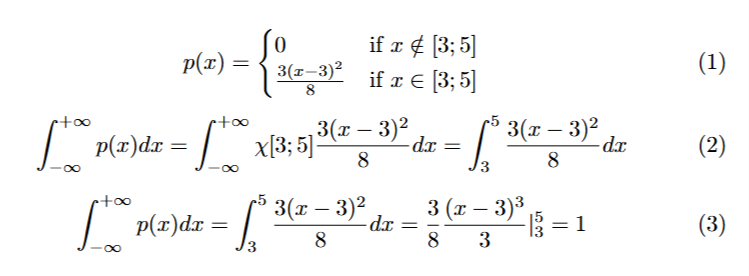

### Задание 2

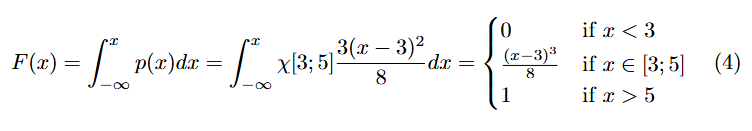

In [130]:
def F(x):
  if x < 3:
    return 0
  elif 3 <= x <= 5:
    return (x - 3)**3 / 8
  else:
    return 1

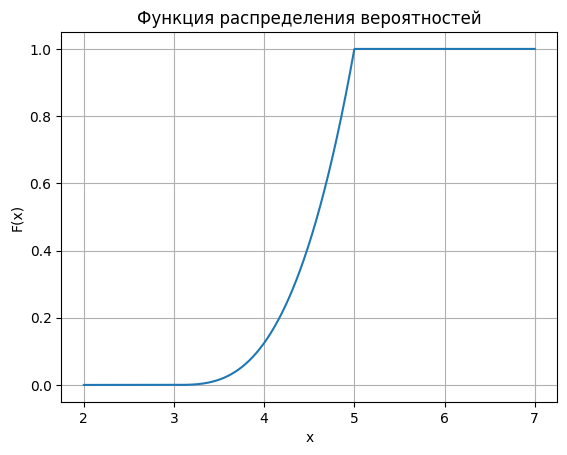

In [131]:
x = np.linspace(2, 7, 1000)  
y = [F(xi) for xi in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Функция распределения вероятностей')
plt.grid(True)
plt.show()

### Задание 3, 4

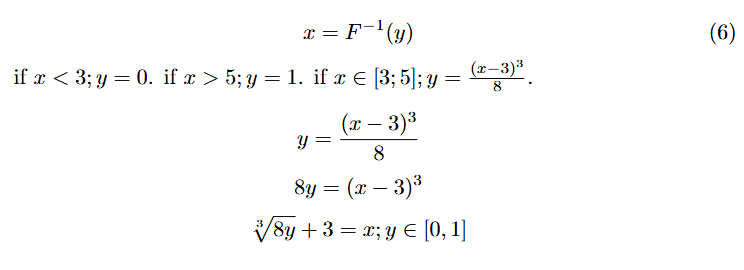

In [132]:
def F_inverse(y):
  if 0 < y < 1:
    return 2 * np.cbrt(y) + 3
  else:
    return

In [133]:
n_values = [10, 100, 1000]

In [134]:
def pdf(x):
    if 3 <= x <= 5:
        return 3 * (x - 3)**2 / 8
    else:
        return 

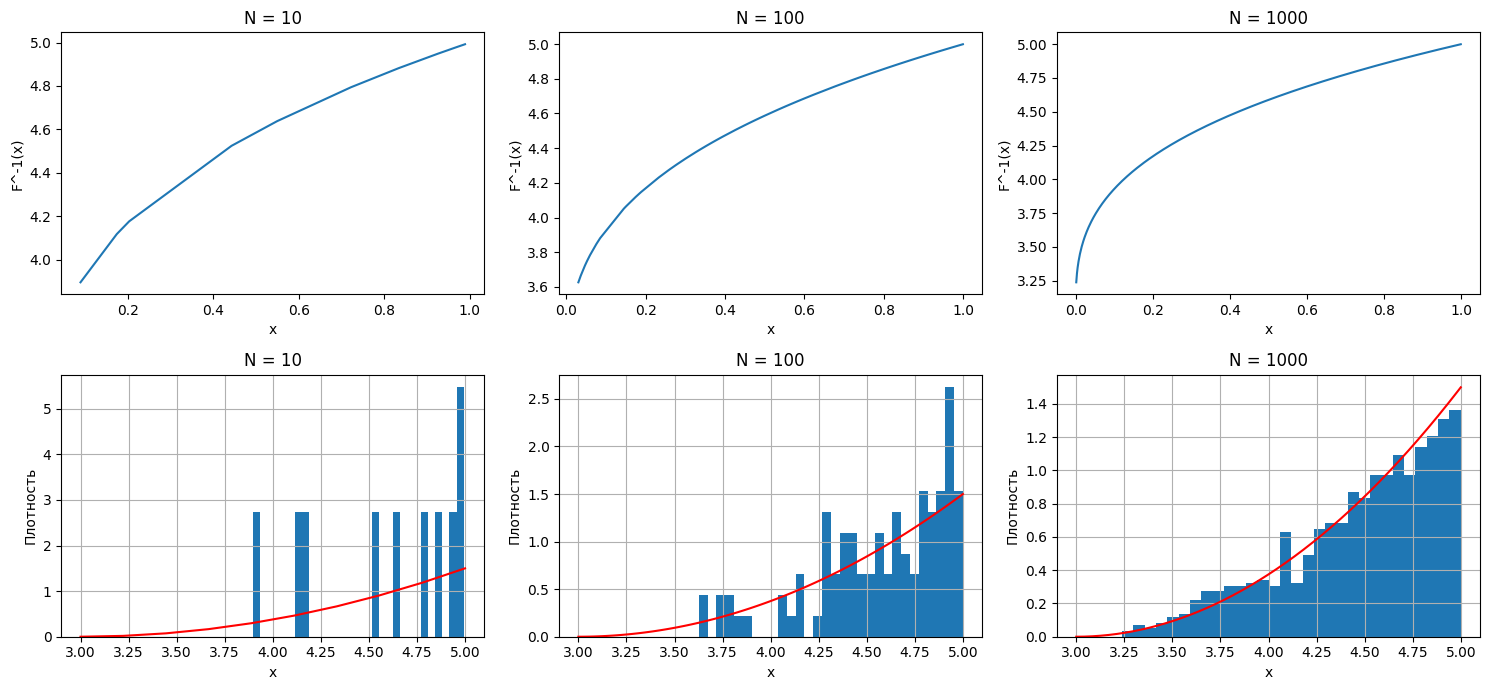

In [135]:
fig, axes = plt.subplots(2, len(n_values), figsize=(15, 7))
for i, n in enumerate(n_values):
  uniform_samples = np.random.uniform(0, 1, n)
  transformed_samples = [F_inverse(u) for u in uniform_samples]
  uniform_samples = uniform_samples[:len(transformed_samples)]

  axes[0][i].plot(sorted(uniform_samples), sorted(transformed_samples))
  axes[0][i].set_title(f'N = {n}')
  axes[0][i].set_xlabel('x')
  axes[0][i].set_ylabel('F^-1(x)')

  axes[1][i].hist(transformed_samples, density=True, bins=30)
  axes[1][i].set_title(f'N = {n}')
  axes[1][i].set_xlabel('x')
  axes[1][i].set_ylabel('Плотность')

  x_range = np.linspace(3, 5, n) 
  pdf_values = [pdf(xi) for xi in x_range]
  axes[1][i].plot(x_range, pdf_values, 'r-', label='Теоретическая p')
  axes[1][i].grid(True)

plt.tight_layout()
plt.show()

### Задание 5, 6

In [136]:
def stats(data):
    """
    Выводит статистику по выборке.
    """
    data = np.array(data)

    stats = {}

    stats['min'] = np.min(data) 
    stats['max'] = np.max(data)
    stats['range'] = stats['max'] - stats['min'] # размах
    stats['mean'] = np.mean(data)

    ''' Выборочная дисперсия
    Вычисляется как среднее квадратов отклонений от среднего.
    Применение: Показывает, насколько "разбросаны" данные вокруг среднего.
    Интерпретация: Большая дисперсия указывает на большую изменчивость, маленькая дисперсия - на малую изменчивость.
    '''
    stats['variance_unbiased'] = np.var(data, ddof=1) # Несмещенная делится на N
    stats['variance_biased'] = np.var(data) # Смещенная делится на N-1

    stats['std'] = np.std(data, ddof=1) # Среднеквадратическое отклонение
    # Квадратный корень из дисперсии.

    stats['median'] = np.median(data)

    # Квантили
    '''
    Значения, которые делят упорядоченный набор данных на четыре равные части (квартили). 25-й квантиль (Q1) - это значение, ниже которого находится 25% данных. 75-й квантиль (Q3) - это значение, ниже которого находится 75% данных.
    '''
    stats['q25'] = np.quantile(data, 0.25)
    stats['q75'] = np.quantile(data, 0.75)

    # Коэффициент вариации
    '''
    Отношение среднеквадратического отклонения к среднему (std / mean).
    '''
    stats['cv'] = stats['std'] / stats['mean'] if stats['mean'] != 0 else np.nan 

    # Коэффициент асимметрии Показывает, насколько симметрично распределение относительно среднего.
    stats['skewness'] = skew(data)

    # Коэффициент эксцесса
    # Мера "остроты" или "плосковершинности" распределения относительно нормального распределения.
    # Применение: Показывает, насколько часто встречаются экстремальные значения (хвосты) в распределении.
    stats['kurtosis'] = kurtosis(data)

    return stats

In [137]:
results = stats(transformed_samples)

for key, value in results.items():
    print(f"{key}: {value}")

min: 3.2383509835409594
max: 4.9991848412942055
range: 1.760833857753246
mean: 4.473317372182861
variance_unbiased: 0.16052906568434439
variance_biased: 0.16036853661866005
std: 0.40066078630725066
median: 4.5578722336071245
q25: 4.22739995798527
q75: 4.805678573231944
cv: 0.08956681428390106
skewness: -0.7891166042361841
kurtosis: -0.16867926882461814


### Задание 7, 8

In [169]:
def empirical_cdf(samples, x):
    return np.mean(samples <= x)

def empirical_pdf(samples, x, h=0.1):
    return np.mean((x - h <= samples) & (samples <= x + h)) / (2 * h)

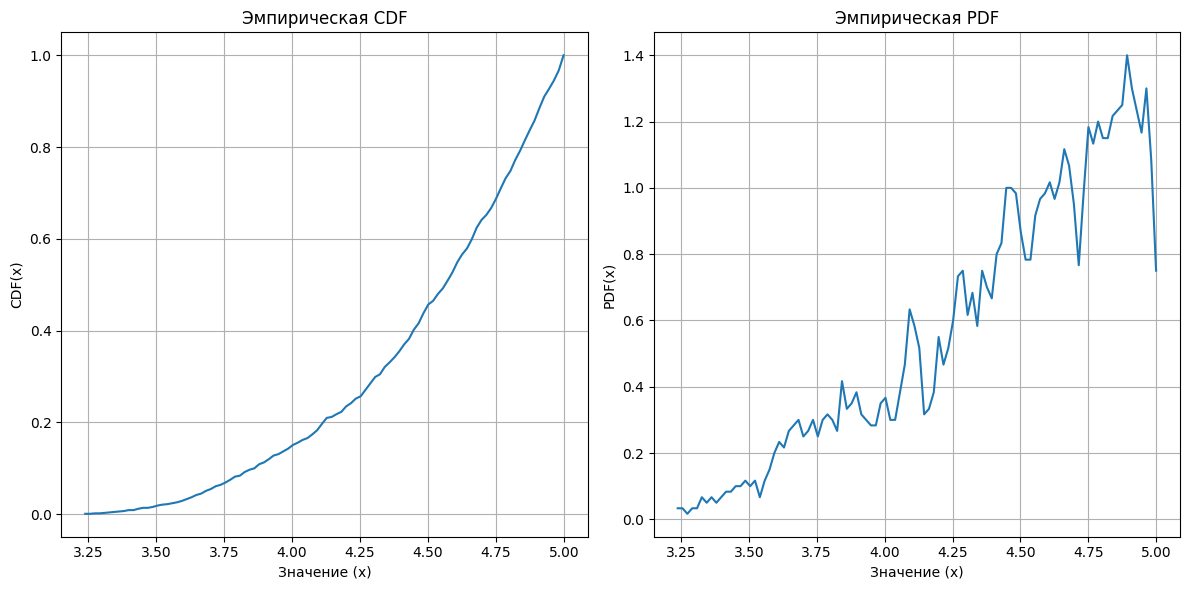

In [ ]:
x_values = np.linspace(np.min(transformed_samples), np.max(transformed_samples), 100)

cdf_values = [empirical_cdf(transformed_samples, x) for x in x_values]
pdf_values = [empirical_pdf(transformed_samples, x, h=0.03) for x in x_values]  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.plot(x_values, cdf_values)
plt.xlabel('Значение (x)')
plt.ylabel('CDF(x)')
plt.title('Эмпирическая CDF')
plt.grid(True)

plt.subplot(1, 2, 2)  
plt.plot(x_values, pdf_values)
plt.xlabel('Значение (x)')
plt.ylabel('PDF(x)')
plt.title('Эмпирическая PDF')
plt.grid(True)

plt.tight_layout()
plt.show()